# Santander Consumer stocks prediction from Bank Organization

In [2]:
!pwd

/Users/aelinadas/Anaconda-Data Science-Jupyter/Jupyter Notebook/02_001050895_AelinaDas


In [3]:
# Better do this in an anaconda terminal on windows or bash shell on mac
!pip install pandas_datareader

In [4]:
# From pandas_datareader import data, wb
import pandas as pd
# the line below is the fix for is_list_like lub
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as web
import datetime
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2020, 1, 30)
bac = web.DataReader('SC', 'yahoo', start, end)
bac.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,15.79,15.38,15.63,15.79,1362900.0,14.796560
2016-01-05,15.93,15.35,15.81,15.38,1851400.0,14.412355
2016-01-06,15.46,14.90,15.12,15.09,2055200.0,14.140602
2016-01-07,15.16,14.27,14.90,14.37,2387600.0,13.465899
2016-01-08,14.45,13.94,14.43,14.04,2692800.0,13.156664
2016-01-11,14.23,13.84,14.11,14.05,1719000.0,13.166034
2016-01-12,14.35,13.61,14.17,13.77,2390700.0,12.903651
2016-01-13,13.91,13.23,13.69,13.36,2823000.0,12.519445
2016-01-14,13.73,13.13,13.44,13.69,2740700.0,12.828684


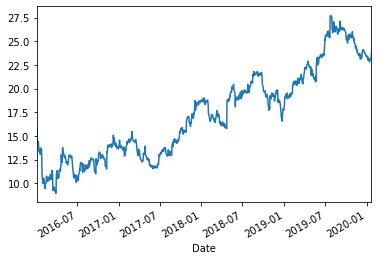

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
vol = bac['High']
vol.plot()

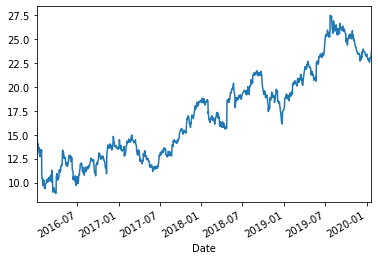

In [6]:
close = bac['Close']
close.plot()

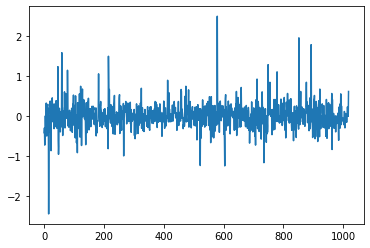

In [7]:
import numpy as np
returns = np.diff(close)
plt.plot(returns)

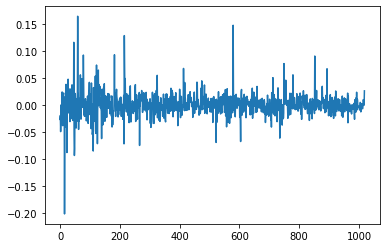

In [8]:
import numpy as np
returns = np.diff(np.log(close))
plt.plot(returns)

In [9]:
vol.corr(close)

0.9993265174101457

## Time Series Exploratory Data Analysis

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sc = pd.read_csv('data/SC.csv', index_col=['Date'], parse_dates=['Date'])
sc.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-23,25.750000,26.500000,25.000000,25.200001,23.453806,34094000
2014-01-24,25.280001,25.280001,24.000000,24.209999,22.532408,8034700
2014-01-27,24.230000,24.990000,24.190001,24.799999,23.081522,3540900
2014-01-28,24.639999,25.730000,24.430000,25.690001,23.909851,2766700
2014-01-29,25.290001,25.799999,25.090000,25.620001,23.844704,2946100
2014-01-30,25.719999,26.100000,25.559999,25.770000,23.984310,1122300
2014-01-31,25.350000,25.879999,25.110001,25.629999,23.854010,678800
2014-02-03,25.959999,25.959999,25.240000,25.250000,23.500341,1113400
2014-02-04,25.200001,25.459999,24.760000,25.180000,23.435192,961500


In [13]:
drop_cols = ['Adj Close','Volume']
sc.drop(drop_cols, axis=1, inplace=True)

In [14]:
sc.head()

,Open,High,Low,Close
Date,,,,
2014-01-23,25.750000,26.500000,25.000000,25.200001
2014-01-24,25.280001,25.280001,24.000000,24.209999
2014-01-27,24.230000,24.990000,24.190001,24.799999
2014-01-28,24.639999,25.730000,24.430000,25.690001
2014-01-29,25.290001,25.799999,25.090000,25.620001


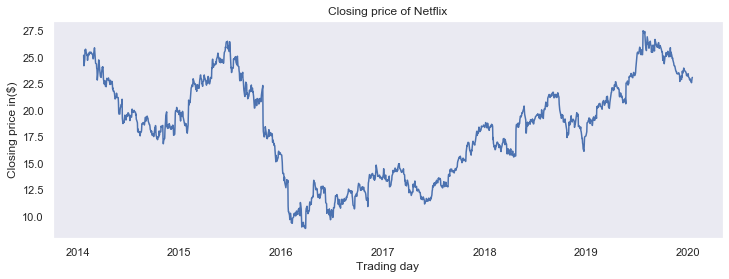

In [15]:
# Plot closing price

plt.figure(figsize=(12, 4))
plt.plot(sc.Close)
plt.title('Closing price of Netflix')
plt.ylabel('Closing price in($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

## Moving Average

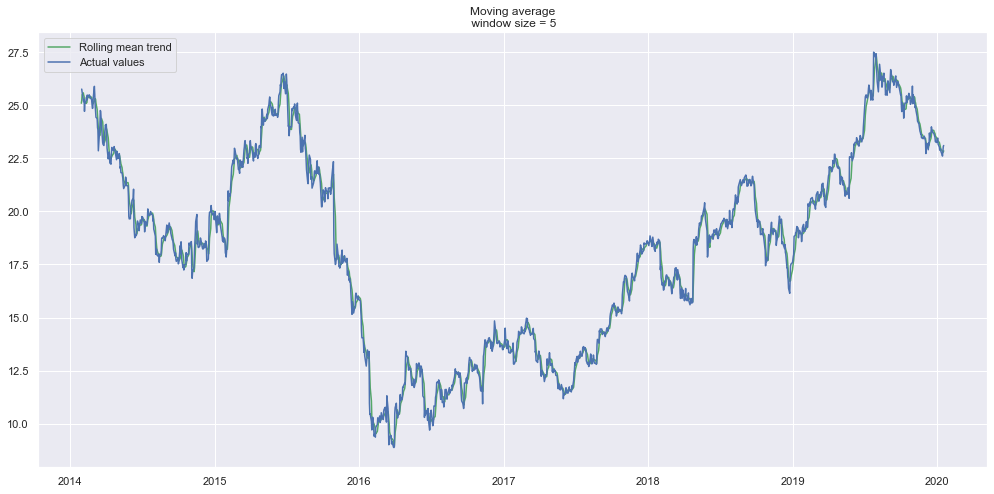

In [16]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(sc.Close, 5)

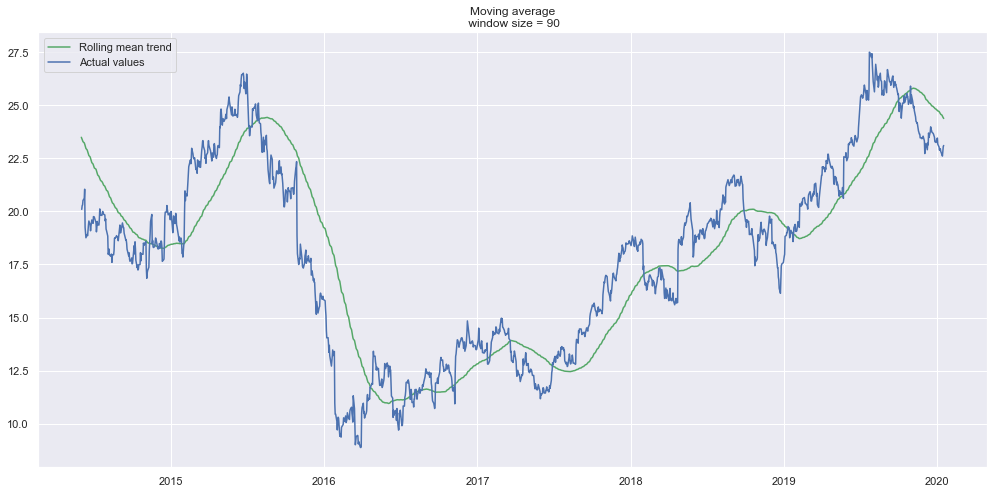

In [17]:
#Smooth by previous quarter (90 days)
plot_moving_average(sc.Close, 90)

## Exponential smoothing

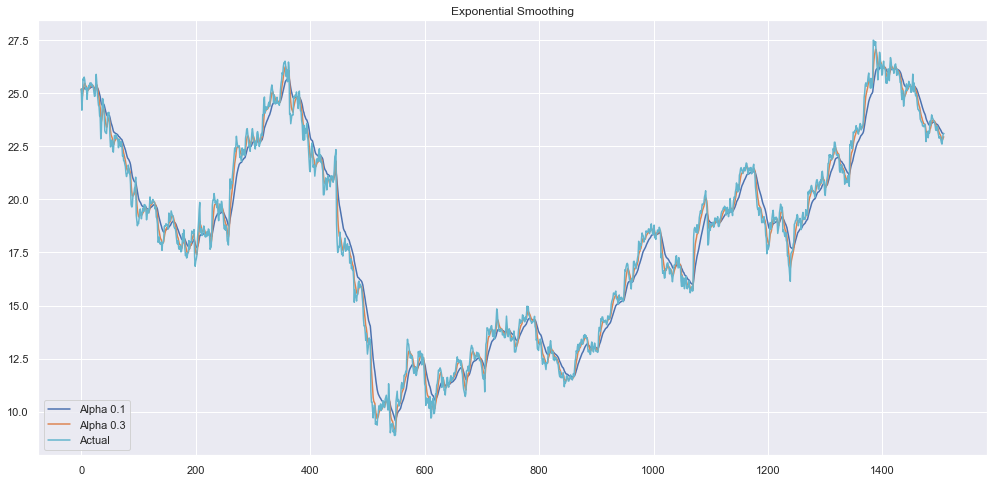

In [18]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(sc.Close, [0.1, 0.3])

## Double Exponential

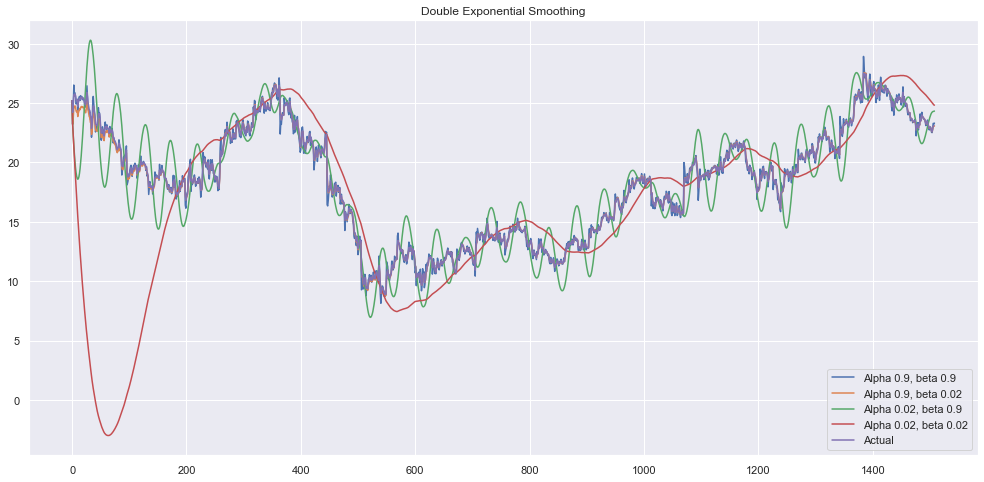

In [19]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(sc.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

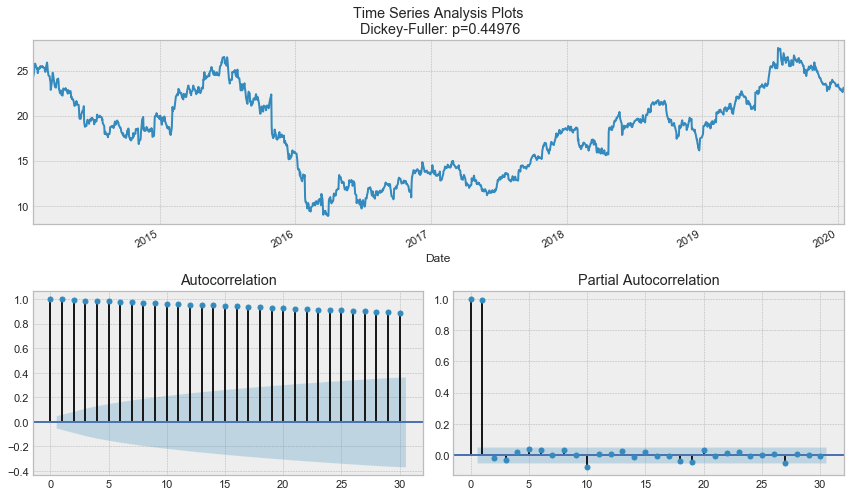

In [20]:
import statsmodels.api as sm
import statsmodels as smt
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(sc.Close, lags=30)

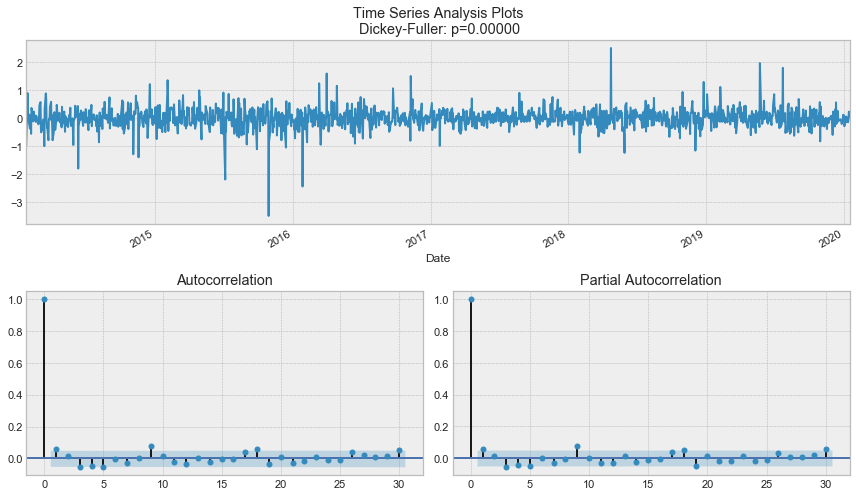

In [22]:
# Take the first difference to remove to make the process stationary
sc_diff = sc.Close - sc.Close.shift(1)

tsplot(sc_diff[1:], lags=30)

## Stocks prediction using Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [24]:
pd.concat([sc.Close, sc.Close.shift(-1)], axis=1)

,Close,Close
Date,,
2014-01-23,25.200001,24.209999
2014-01-24,24.209999,24.799999
2014-01-27,24.799999,25.690001
2014-01-28,25.690001,25.620001
2014-01-29,25.620001,25.770000
...,...,...
2020-01-13,22.680000,22.610001
2020-01-14,22.610001,22.840000
2020-01-15,22.840000,23.059999


In [25]:
sc.head()

,Open,High,Low,Close
Date,,,,
2014-01-23,25.750000,26.500000,25.000000,25.200001
2014-01-24,25.280001,25.280001,24.000000,24.209999
2014-01-27,24.230000,24.990000,24.190001,24.799999
2014-01-28,24.639999,25.730000,24.430000,25.690001
2014-01-29,25.290001,25.799999,25.090000,25.620001


In [26]:
sc.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [27]:
# Need to remove NA
sc = sc.dropna()
# Regression - Try to predict closing value of stocks (y) from remaining columns (X)
X = sc[[x for x in sc.columns]].iloc[:-1]
# Get training set (X_train)
y = sc.Close.shift(-1).dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Accuracy of our model

In [29]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
rf_model.score(X_test, y_test)

0.9913804636917499

In [30]:
y_pred = rf_model.predict(X_test)

In [31]:
type(y_pred)

numpy.ndarray

In [32]:
y_pred[0:10]

array([12.74     , 20.784    , 24.8389997, 11.931    , 17.2850004,
       21.1439997, 17.7789996, 19.4559998, 10.858    , 18.6690006])

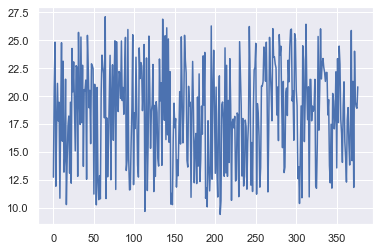

In [33]:
import matplotlib.pyplot as plt
plt.plot(y_pred)

In [34]:
type(y_test)

pandas.core.series.Series

In [35]:
y_test2 = y_test.as_matrix()
type(y_test2)

numpy.ndarray

In [36]:
y_test2[0:10]

array([12.24    , 20.35    , 24.18    , 12.1     , 16.950001, 21.540001,
       17.76    , 19.780001, 12.43    , 18.83    ])

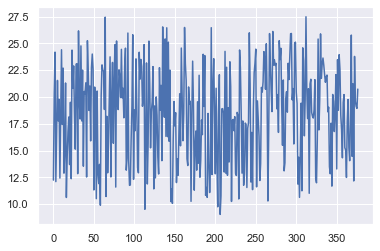

In [37]:
import matplotlib.pyplot as plt
plt.plot(y_test2)

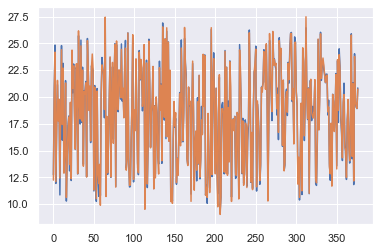

In [38]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test2)

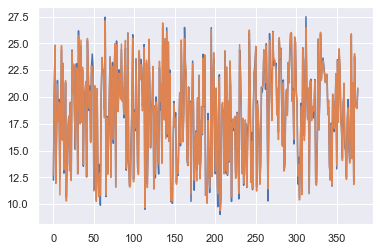

In [39]:
import matplotlib.pyplot as plt
plt.plot(y_test2)
plt.plot(y_pred)

In [40]:
pd.concat([pd.Series(rf_model.predict(X_test)), y_test.reset_index(
drop=True)], axis=1)

,0,Close
0,12.740,12.240000
1,20.784,20.350000
2,24.839,24.180000
3,11.931,12.100000
4,17.285,16.950001
...,...,...
372,24.027,23.780001
373,19.489,19.600000
374,19.047,19.110001
375,18.913,18.930000


In [41]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('Close', 0.7175008052760748),
 ('Low', 0.1567076919795268),
 ('High', 0.09416102116811118),
 ('Open', 0.03163048157628719)]